In [3]:
%matplotlib inline 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
matplotlib.rcParams.update({'font.size': 22})

# Вычислительная математека

## Методы приближения функций, основанные на минимизации нормы

## Два подхода к приближению

1. Интерполяция: $\phi(x_k) = f(x_k)$
2. Минимизация нормы $\Vert \phi - f \Vert \to \min$
    * Равномерное приближение $\displaystyle \Vert f \Vert = \sup_x \lvert f(x) \rvert$
    * Приближение в гильбертовом пространстве $\Vert f \Vert = (f,f)^{1/2}$, например 
    $$
    \Vert f \Vert = \left(\int_a^b \lvert f(x) \rvert^2 \; dx\right)^{1/2}
    $$

## Равномерные приближения 
$R(x) = f(x) - p_n(x)$  
**Теорема:** Полином $p_n$ является полиномом наилучшего равномерного приближения для $f \in C[a,b]$ $\Leftrightarrow$ есть по крайней мере $n+2$ *точек альтернанса* $x_1, \ldots, x_{n+2}$:
1. $\lvert R(x_i) \rvert = \Vert R \Vert_{C[a,b]}, \; i=1,\ldots,n+2$ 
2. $R(x_i) R(x_{i+1}) < 0, \; i = 1, \ldots, n+1$

    

## Полиномы, наименее уклоняющиеся от нуля

1. Полином $q_n = x^n + a_{n-1} x^{n-1} + \ldots + a_0$ называется наименее уклоняющимся от нуля на $[a,b]$, если он имеет наименьшую норму $C[a,b]$ среди всех многочленов такого вида
2. Согласно определению 
$$
\Vert q_n(x) \Vert_{C[a,b]} \le \Vert x^n - p_{n-1}(x) \Vert_{C[a,b]} 
$$
для любого $p_{n-1}$.  
Следовательно, разность $x^n - q_n(x)$ - наилучшее равномерное приближение к функции $x^n$ среди всех полиномов степени $\le n-1$


## Полиномы, наименее уклоняющиеся от нуля

3. Многочлен $\frac{1}{2^{n-1}} T_n(x)$ имеет $n+1$ точку альтернанса на $[-1,1]$, следовательно $x^n -2^{1-n} T_n(x)$ имеет степень $\le n-1$ и является наилучшим приближением к $x^n$ на $[-1,1]$
4. На произвольном отрезке $[a,b]$ с помощью замены 
$$
\begin{align}
& x = \frac{a+b}{2} + t \frac{b-a}{2} \\
& t = \frac{2x - a - b}{b - a}
\end{align}
$$
Получаем многочлен 
$$ 
Q_n(x) = 2^{1-2n} (b-a)^n T_n\left(\frac{2x - a - b}{b - a}\right)
$$

## Интерполяция и равномерные приближения

* Насколько наилучшее приближение лучше интерполяционного многочлена?  

* Следующая теорема верна для любых проекторов, в том числе для интерполяции:  
**Теорема:** Пусть $f \in C[-1,1]$, $\displaystyle E_n(f) = \min_{\phi \in \mathcal{P}_n} \Vert f - \phi\Vert_{C[-1,1]}$. Тогда, если $L_n$ - интерполяционный полином и $\Vert P_n \Vert$ - норма соответствующего оператора, то
$$
\Vert f - L_n\Vert_C \le (1 + \Vert P_n \Vert )E_n(f)
$$

**Доказательство:** $P_n \phi_n = \phi_n$
$$
\Vert f - L_n \Vert \le \Vert f - \phi_n \Vert + \Vert P_n \phi_n - P_n f\Vert = E_n(f) + \Vert P_n (\phi_n - f) \Vert \le (1 + \Vert P_n \Vert)E_n(f)
$$
В частности для чебышевских сеток: 
$$
\Vert f - L_n \Vert (1 + c \ln n) E_n(f)
$$

## Алгоритм Ремеза

Итерационный алгоритм вычисления полинома наилучшего приближения основан на свойстве альтернанса:

Возьмем $n+2$ точки $x_1, \ldots, x_{n+2}$  
Далее
1. Решаем линейную систему:
$$
c_0 + c_1 x_i + \ldots c_n x_i^n + (-1)^i E = f(x_i), \; i = 1,2,\ldots, n+2 \\
$$
относительно неизвестных $c_0,\ldots, c_n, E$.
2. Находим точки локального максимума ошибки $\lvert f(x) - p_n \rvert$, $p_n = c_0 + c_1 x + \ldots + c_n x^n$.  
Если условие альтернанса выполнено с заданной точностью - останавливаемся, иначе
3. Заменяем часть точек на точки локального максимума, так чтобы знак $f - p_n$ чередовался. Переходим к (1)

## Приближение в $L_2$

* Для любого вектора $f$ в гильбертовом пространстве и любого замкнутого подпространства $\Phi$ существует единственное разложение:
$$
f = u + \phi, \; \phi \in \Phi, \; u \perp \Phi
$$

* Пусть $\Phi = \mbox{span}\{v_1, \ldots, v_n\}$. Тогда коэффициенты разложения $\phi = c_1 v_1 + \ldots + c_n v_n$ удовлетворяют системе с матрицей Грамма:
$$
\left[\begin{array}{ccc}
(v_1,v_1) & \ldots & (v_n,v_1) \\
\ldots & \ldots & \ldots \\
(v_1, v_n) & \ldots & (v_n, v_n)
\end{array}\right]
\left[\begin{array}{c}
c_1 \\
\vdots \\
c_n
\end{array}\right] = 
\left[\begin{array}{c}
(v_1,f) \\
\vdots \\
(v_n,f)
\end{array}\right]
$$
где $(f,g) = \int_a^b f(x) g(x) \, dx$

## Ортогональные многочлены

* Можно ввести скалярное произведение для любой неотрицательной функции с положительным интегралом $\omega$:
$$
(f,g) = \int_a^b f(x) g(x) \omega(x) \, dx
$$
* Если ортогонализовать многочлены $1, x, \ldots, x^n$, получим систему *ортогональных многочленов* $(L_i, L_j) = \delta_{ij}$

* Для любых ортогональных многочленов верно трехчленное реккурентное соотношение:
$$
x L_n(x) = \beta_{n-1} L_{n-1}(x) + \alpha_n L_n(x) + \beta_n L_{n+1}(x), \; n = 0, 1, \ldots
$$

**Доказательство:** 
* многочлен $x L_n$ степени $n+1$ можно разложить по многочленам $L_0, \ldots, L_{n+1}$:
$$
x L_n(x) = s_{n0} L_0(x) + \ldots + s_{nn} L_n(x) + s_{n n+1} L_{n+1}(x)
$$

* $s_{nj} = (xL_n, L_j) = (L_n, x L_j) = 0, \mbox{ при } j \le n - 2$

* Обозначим $\alpha_n = s_{nn}, \beta_n = s_{n,n+1} = (x L_n, L_{n+1})$. $s_{n,n-1} = (x L_n, L_{n-1} ) = (x L_{n-1}, L_n) = \beta_{n-1}$

## Пример
Для системы степеней матрица Грамма имеет элементы
\begin{align}
G_{ij} = (e_i,e_j) = \int_{0}^1 x^{i+j-2} \, dx = \left.\frac{x^{i+j-1}}{i+j-1}\right\vert_0^1 = \frac{1}{i+j-1}
\end{align}

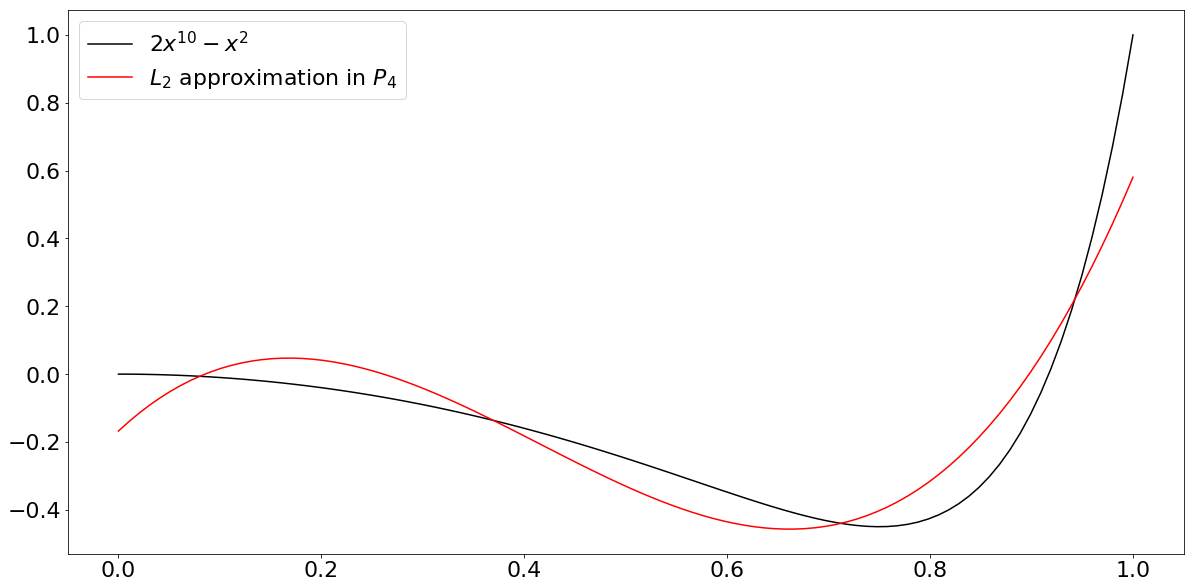

In [4]:
n = 4
p = 10
G = np.zeros((n,n))
b = np.zeros((n,1))
for i in range(1,n+1):
    b[i-1] = 2/(p+i) - 1/(i+2)
    for j in range(1,n+1):
        G[i-1,j-1] = 1/(i+j-1)
c1 = np.linalg.solve(G,b) #  Solve linear system
x = np.linspace(0,1,100)
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, 2 * x**p - x**2,'k-', label = '$2x^{10} -x^2$')
M = np.zeros((x.size, n))
for j in range(n):
    M[:,j] = x ** j
y = np.dot(M, c1)
ax.plot(x, y, 'r-', label = '$L_2$ approximation in $P_4$')
ax.legend()